In [1]:
import os, sys
sys.path.append('../../')
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from adjustText import adjust_text
from utils.evaluate import evaluate_clusters
from utils.evaluate import evaluate_unassigned

In [2]:
pth = os.path.join('..', '..', 'data', 'training_us.gpkg')
gdf_us = gpd.read_file(pth)

In [3]:
gdf_us

,city,state,country,latitude,longitude,population,msa,training,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,True,POINT (-8207971.222 5067414.863)
1,seven hills,ohio,united states,41.39533,-81.67624,11690,None,True,POINT (-9092157.447 5070828.79)
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,None,True,POINT (-9001026.859 4814418.565)
3,jacksonville,oregon,united states,42.31346,-122.96699,2883,Jacksonville FL MSA,True,POINT (-13688622.711 5208050.499)
4,tigerville,south carolina,united states,35.06845,-82.36845,1312,Greenville-Mauldin-Easley SC MSA,True,POINT (-9169213.911 4173187.121)
...,...,...,...,...,...,...,...,...,...
7151,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,True,POINT (-10813762.352 3837467.237)
7152,belfast,maine,united states,44.42591,-69.00642,6682,None,False,POINT (-7681759.536 5531591.056)
7153,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,True,POINT (-9334258.415 5321578.2)
7154,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,True,POINT (-9369783.804 4003071.597)


In [4]:
# split MSA (>1 city) vs. MSA (1 city) vs. unassigned
msa_msk = ~gdf_us.msa.isna()
single_msk = ~gdf_us.msa.duplicated(keep = False)
gdf_us2p = gdf_us.loc[msa_msk & ~single_msk].copy()
gdf_us1 = gdf_us.loc[msa_msk & single_msk].copy()
gdf_us0 = gdf_us.loc[~msa_msk].copy()

In [5]:
gdf_us2p

,city,state,country,latitude,longitude,population,msa,training,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,True,POINT (-8207971.222 5067414.863)
3,jacksonville,oregon,united states,42.31346,-122.96699,2883,Jacksonville FL MSA,True,POINT (-13688622.711 5208050.499)
4,tigerville,south carolina,united states,35.06845,-82.36845,1312,Greenville-Mauldin-Easley SC MSA,True,POINT (-9169213.911 4173187.121)
6,yorktown,indiana,united states,40.17365,-85.49414,11231,Muncie IN MSA,False,POINT (-9517164.131 4891208.804)
7,marlborough,connecticut,united states,41.63310,-72.45470,6368,Hartford-West Hartford-East Hartford CT MSA,True,POINT (-8065620.31 5106177.069)
...,...,...,...,...,...,...,...,...,...
7150,villa rica,georgia,united states,33.73205,-84.91911,14904,Atlanta-Sandy Springs-Marietta GA MSA,True,POINT (-9453152.084 3992879.385)
7151,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,True,POINT (-10813762.352 3837467.237)
7153,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,True,POINT (-9334258.415 5321578.2)
7154,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,True,POINT (-9369783.804 4003071.597)


In [6]:
gdf_us1

,city,state,country,latitude,longitude,population,msa,training,geometry
336,chatham,virginia,united states,36.82569,-79.39808,1481,Danville VA MSA,False,POINT (-8838553.836 4414837.992)
1013,carson city,nevada,united states,39.16380,-119.76740,54521,Carson City NV MSA,True,POINT (-13332445.982 4745161.75)
2238,saint simons island,georgia,united states,31.15051,-81.36954,13000,Brunswick GA MSA,True,POINT (-9058015.759 3652311.197)
2325,charleston,tennessee,united states,35.28730,-84.75827,676,Cleveland TN MSA,True,POINT (-9435247.457 4202992.933)
2327,hartselle,alabama,united states,34.44343,-86.93528,14493,Decatur AL MSA,True,POINT (-9677591.102 4088500.394)
2874,dandridge,tennessee,united states,36.01537,-83.41489,2924,Morristown TN MSA,False,POINT (-9285703.079 4302736.466)
3638,forsyth,illinois,united states,39.93254,-88.95119,3584,Decatur IL MSA,False,POINT (-9902001.176 4856144.013)
4168,muskegon,michigan,united states,43.23418,-86.24839,38401,Muskegon-Norton Shores MI MSA,True,POINT (-9601126.857 5347684.631)
4297,san angelo,texas,united states,31.46377,-100.43704,100450,San Angelo TX MSA,True,POINT (-11180600.15 3693126.109)
4435,odessa,texas,united states,31.84568,-102.36764,118968,Odessa TX MSA,True,POINT (-11395513.559 3743070.732)


In [7]:
gdf_us0

,city,state,country,latitude,longitude,population,msa,training,geometry
1,seven hills,ohio,united states,41.39533,-81.67624,11690,None,True,POINT (-9092157.447 5070828.79)
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,None,True,POINT (-9001026.859 4814418.565)
5,olivette,missouri,united states,38.66533,-90.37595,7870,None,True,POINT (-10060604.734 4673845.715)
8,fayetteville,west virginia,united states,38.05289,-81.10399,2892,None,True,POINT (-9028454.868 4586900.093)
10,selmer,tennessee,united states,35.17008,-88.59227,4488,None,True,POINT (-9862046.385 4187018.425)
...,...,...,...,...,...,...,...,...,...
7144,ellijay,georgia,united states,34.69481,-84.48215,1680,None,True,POINT (-9404509.919 4122483.998)
7145,haverhill,massachusetts,united states,42.77620,-71.07728,62765,None,False,POINT (-7912286.617 5277969.008)
7148,dudley,massachusetts,united states,42.04510,-71.93007,11165,None,False,POINT (-8007218.765 5167737.601)
7149,commerce,georgia,united states,34.20400,-83.45711,6762,None,True,POINT (-9290402.988 4056227.245)


In [8]:
# compute distance per capita (~inverse density)
evaluate_clusters(gdf_us2p, cluster_key = 'msa')

In [9]:
gdf_us2p

,city,state,country,latitude,longitude,population,msa,training,geometry,msa_centroid,d_centroid,msa_population,dpc,log_dpc
5377,tinley park,illinois,united states,41.57337,-87.78449,57143,Chicago-Naperville-Joliet IL-IN-WI MSA,True,POINT (-9772124.726 5097285.033),POINT (-9775801.581 4626757.122),3.858293e+03,8137016,0.000474,-3.324070
4747,orland park,illinois,united states,41.63031,-87.85394,58619,Chicago-Naperville-Joliet IL-IN-WI MSA,True,POINT (-9779855.865 5105761.537),POINT (-9775801.581 4626757.122),8.532533e+03,8137016,0.001049,-2.979387
1114,mokena,illinois,united states,41.52614,-87.88922,19923,Chicago-Naperville-Joliet IL-IN-WI MSA,True,POINT (-9783783.217 5090259.699),POINT (-9775801.581 4626757.122),8.967787e+03,8137016,0.001102,-2.957780
1346,oak forest,illinois,united states,41.60281,-87.74394,28074,Chicago-Naperville-Joliet IL-IN-WI MSA,True,POINT (-9767610.721 5101666.752),POINT (-9775801.581 4626757.122),9.319956e+03,8137016,0.001145,-2.941051
408,palos park,illinois,united states,41.66725,-87.83033,4888,Chicago-Naperville-Joliet IL-IN-WI MSA,True,POINT (-9777227.612 5111264.699),POINT (-9775801.581 4626757.122),1.170711e+04,8137016,0.001439,-2.842016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,redding,connecticut,united states,41.30510,-73.39160,9176,Redding CA MSA,True,POINT (-8169915.541 5057448.537),POINT (-11802873.877 4539603.269),3.633429e+06,110975,32.740966,1.515091
6046,logan,ohio,united states,39.54007,-82.40710,7117,Logan UT-ID MSA,True,POINT (-9173516.41 4799329.881),POINT (-11358970.709 4577897.916),2.192555e+06,62700,34.968983,1.543683
4060,bogart,georgia,united states,33.94928,-83.53461,1042,Athens-Clark County GA MSA,True,POINT (-9299030.249 4021993.601),POINT (-9648171.215 3756046.153),3.499090e+05,4741,73.804886,1.868085
3396,watkinsville,georgia,united states,33.86290,-83.40877,2872,Athens-Clark County GA MSA,False,POINT (-9285021.804 4010407.668),POINT (-9648171.215 3756046.153),3.634023e+05,4741,76.650978,1.884518


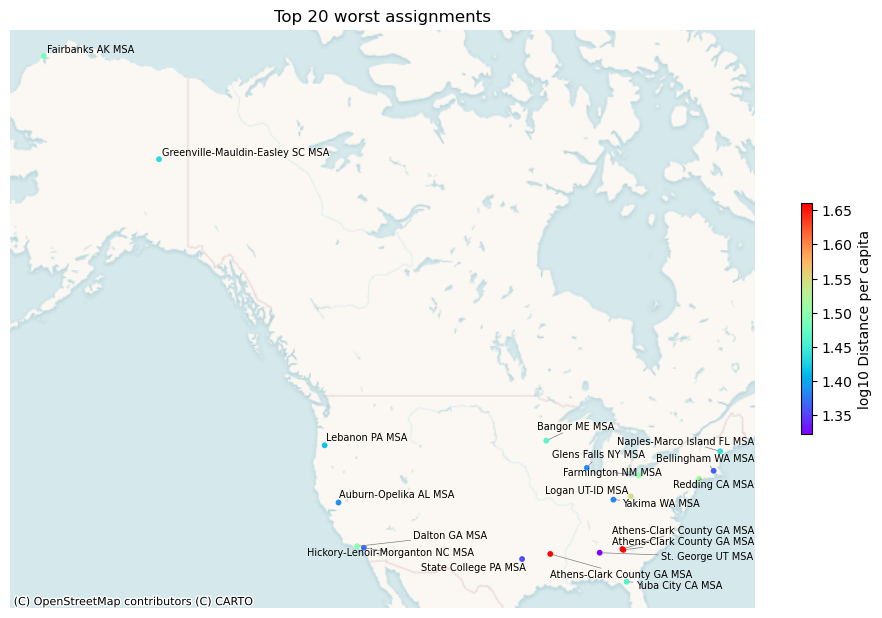

In [10]:
top_n, ms, fs = 20, 10., 7.
gdf_plt = gdf_us2p.tail(top_n)

fig, ax = plt.subplots(1, 1, figsize = (12, 12))
gdf_plt.plot(column = 'log_dpc',
             cmap = 'rainbow',
             vmax = 1.66,
             markersize = ms,
             legend = True,
             legend_kwds = {
              'label': 'log10 Distance per capita',
              'shrink' : .25},
             ax = ax)

basemap = cx.providers.CartoDB.VoyagerNoLabels
cx.add_basemap(ax, source = basemap)

labels = [ax.text(row.geometry.x,
                  row.geometry.y,
                  row.msa,
                  fontsize = fs)
          for _, row in gdf_plt.iterrows()]

adjust_text(labels, ax = ax, 
            arrowprops = dict(
                arrowstyle = '-', 
                color = 'gray', 
                lw = .5))

ax.set_title(f'Top {top_n} worst assignments')
ax.axis(False)
plt.show()

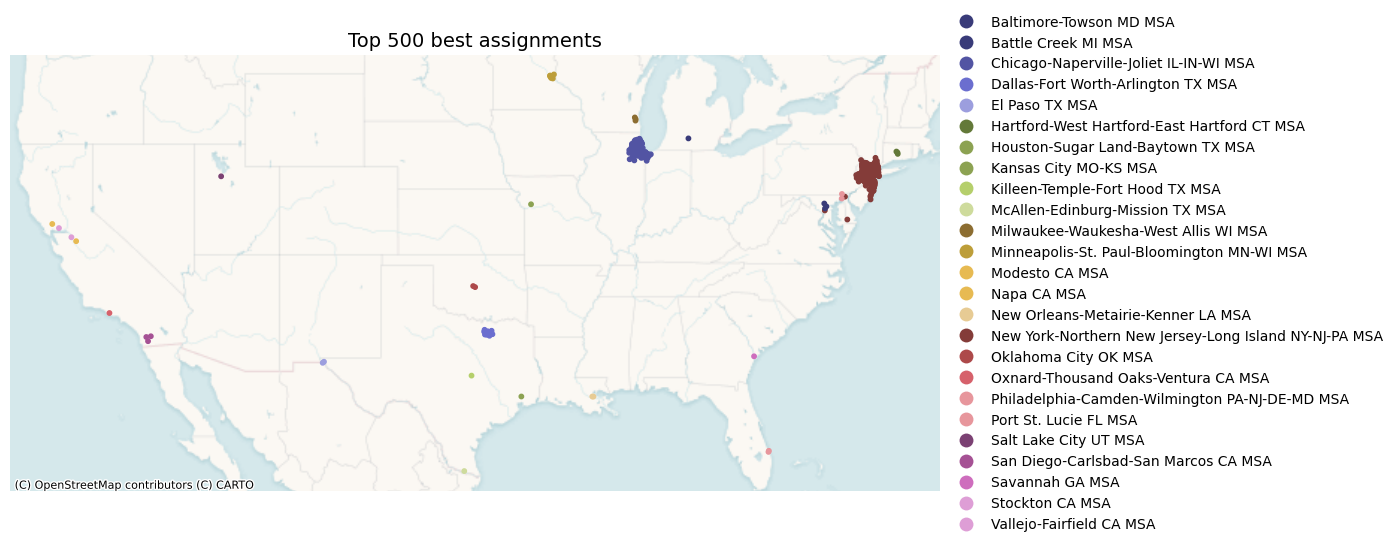

In [11]:
top_n = 500
gdf_plt = gdf_us2p.head(top_n)

fig, ax = plt.subplots(1, 1, figsize = (12, 12))
gdf_plt.plot(column = 'msa',
             cmap = 'tab20b',
             markersize = ms,
             legend = True,
             ax = ax)
cx.add_basemap(ax, source = basemap)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 1.12))
leg.set_frame_on(False)
ax.set_title(f'Top {top_n} best assignments', size = 14)
ax.axis(False)
plt.show()

In [12]:
gdf_us1 = evaluate_unassigned(gdf_us1, gdf_us2p, cluster_key = 'msa')

In [13]:
gdf_us1

,city,state,country,latitude,longitude,population,msa_orig,training,geometry,msa_ref,msa_ref_population,d_centroid,dpc,log_dpc
4654,morgantown,west virginia,united states,39.62953,-79.95590,30708,Morgantown WV MSA,True,POINT (-8900650.074 4812251.734),Washington-Arlington-Alexandria DC-VA-MD-WV MSA,2819292,75490.357254,0.026776,-1.572249
4844,dothan,alabama,united states,31.22323,-85.39049,68567,Dothan AL MSA,False,POINT (-9505625.865 3661773.869),Jacksonville FL MSA,1313034,91680.870973,0.069824,-1.155997
5090,baldwin city,kansas,united states,38.77501,-95.18636,4669,Lawrence KS MSA,True,POINT (-10596097.126 4689494.735),Kansas City MO-KS MSA,1615966,127073.360035,0.078636,-1.104378
4297,san angelo,texas,united states,31.46377,-100.43704,100450,San Angelo TX MSA,True,POINT (-11180600.15 3693126.109),San Antonio TX MSA,1919340,153043.638236,0.079738,-1.098337
336,chatham,virginia,united states,36.82569,-79.39808,1481,Danville VA MSA,False,POINT (-8838553.836 4414837.992),Raleigh-Cary NC MSA,935252,76431.167747,0.081723,-1.087658
1013,carson city,nevada,united states,39.16380,-119.76740,54521,Carson City NV MSA,True,POINT (-13332445.982 4745161.75),Reno-Sparks NV MSA,346316,31833.689911,0.091921,-1.036586
5216,topeka,kansas,united states,39.04833,-95.67804,127265,Topeka KS MSA,True,POINT (-10650830.693 4728596.797),Kansas City MO-KS MSA,1615966,167095.453792,0.103403,-0.985468
3638,forsyth,illinois,united states,39.93254,-88.95119,3584,Decatur IL MSA,False,POINT (-9902001.176 4856144.013),Dayton OH MSA,438931,53207.494372,0.121221,-0.916423
5966,rome,georgia,united states,34.25704,-85.16467,36323,Rome GA MSA,True,POINT (-9480487.698 4063368.659),Columbus GA-AL MSA,247813,35629.091871,0.143774,-0.842319
5954,warner robins,georgia,united states,32.61574,-83.62664,73490,Warner Robins GA MSA,True,POINT (-9309274.982 3844410.243),Jacksonville FL MSA,1313034,197005.771052,0.150039,-0.823797


In [14]:
gdf_us0 = evaluate_unassigned(gdf_us0, gdf_us2p, cluster_key = 'msa')

In [15]:
gdf_us0

,city,state,country,latitude,longitude,population,msa_orig,training,geometry,msa_ref,msa_ref_population,d_centroid,dpc,log_dpc
213,kutztown university,pennsylvania,united states,40.51030,-75.78500,3604,None,False,POINT (-8436347.61 4940377.158),New York-Northern New Jersey-Long Island NY-NJ...,24886411,1.415226e+04,0.000569,-3.245136
4327,orwigsburg,pennsylvania,united states,40.65481,-76.10077,3002,None,True,POINT (-8471498.965 4961558.775),New York-Northern New Jersey-Long Island NY-NJ...,24886411,2.503059e+04,0.001006,-2.997491
2345,frankfort,illinois,united states,41.49587,-87.84866,18653,None,False,POINT (-9779268.098 5085759.815),Chicago-Naperville-Joliet IL-IN-WI MSA,8137016,8.224266e+03,0.001011,-2.995368
2434,tamaqua,pennsylvania,united states,40.79731,-75.96937,6829,None,True,POINT (-8456871.584 4982490.748),New York-Northern New Jersey-Long Island NY-NJ...,24886411,2.975122e+04,0.001195,-2.922457
2133,schuylkill haven,pennsylvania,united states,40.63065,-76.17105,5228,None,True,POINT (-8479322.499 4958014.324),New York-Northern New Jersey-Long Island NY-NJ...,24886411,3.094881e+04,0.001244,-2.905318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,buckland,alaska,united states,65.97895,-161.12622,431,None,True,POINT (-17936488.764 9871087.11),Fairbanks AK MSA,38323,1.178641e+06,30.755452,1.487922
192,kotzebue,alaska,united states,66.89846,-162.59809,3277,None,True,POINT (-18100336.583 10127190.134),Fairbanks AK MSA,38323,1.344263e+06,35.077186,1.545025
101,st mary s,alaska,united states,62.05340,-163.17787,550,None,True,POINT (-18164877.397 8871815.938),Fairbanks AK MSA,38323,1.481379e+06,38.655099,1.587207
3725,solomon,alaska,united states,64.55961,-164.44310,12,None,False,POINT (-18305722.156 9493315.402),Fairbanks AK MSA,38323,1.558621e+06,40.670642,1.609281


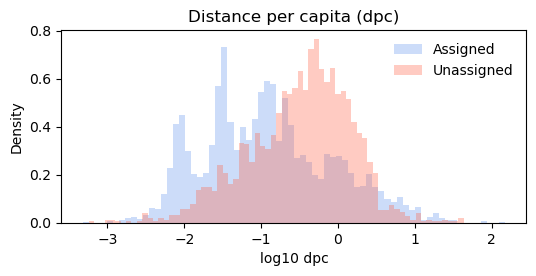

In [18]:
hist_dict = {'Assigned'   : {'gdf' : gdf_us2p, 'facecolor' : 'cornflowerblue'},
             'Unassigned' : {'gdf' : gdf_us0,  'facecolor' : 'tomato'}}

fig, ax = plt.subplots(1, 1, figsize = (6, 2.5))
for key, val in hist_dict.items():
    ax.hist(val['gdf'].log_dpc,
            bins = 70,
            facecolor = val['facecolor'],
            alpha = .33,
            density = True,
            label = key)

plt.legend(frameon = False)
plt.title('Distance per capita (dpc)')
plt.xlabel('log10 dpc')
plt.ylabel('Density')
plt.show()